### Step 1: Set Up the Colab Notebook

Start by installing the necessary libraries in Colab if they are not already installed.

In [12]:
%pip install -q yfinance matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 2: Import the Required Libraries

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 3: Download the ETF Data

In [14]:
# Download stock data for multiple ETFs
tickers = ['SPY', 'QQQ']
data = yf.download(tickers, start='2020-01-01', end='2025-06-01')['Adj Close']

# Display the first few rows of the data to verify
print(data.head())

[*********************100%%**********************]  2 of 2 completed

Ticker             QQQ         SPY
Date                              
2020-01-02  210.271225  303.135590
2020-01-03  208.345093  300.840149
2020-01-06  209.687531  301.987885
2020-01-07  209.658340  301.138794
2020-01-08  211.234161  302.743683


### Step 4: Perform Correlation Analysis

In [15]:
# Calculate daily returns
returns = data.pct_change()

# Calculate correlation matrix
correlation_matrix = returns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
Ticker       QQQ       SPY
Ticker                    
QQQ     1.000000  0.930366
SPY     0.930366  1.000000


### Step 5: Define the Moving Average Strategy

In [16]:
# Backtesting a simple moving average strategy
def moving_average_strategy(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data
    signals['Short MA'] = data.rolling(window=short_window).mean()
    signals['Long MA'] = data.rolling(window=long_window).mean()
    signals['Signal'] = 0.0
    signals['Signal'][short_window:] = np.where(signals['Short MA'][short_window:] > signals['Long MA'][short_window:], 1.0, 0.0)
    signals['Position'] = signals['Signal'].diff()
    return signals


### Step 6: Apply the Strategy to SPY

In [17]:
# Apply strategy to SPY
spy_signals = moving_average_strategy(data['SPY'], short_window=50, long_window=200)


### Step 7: Plot the Results

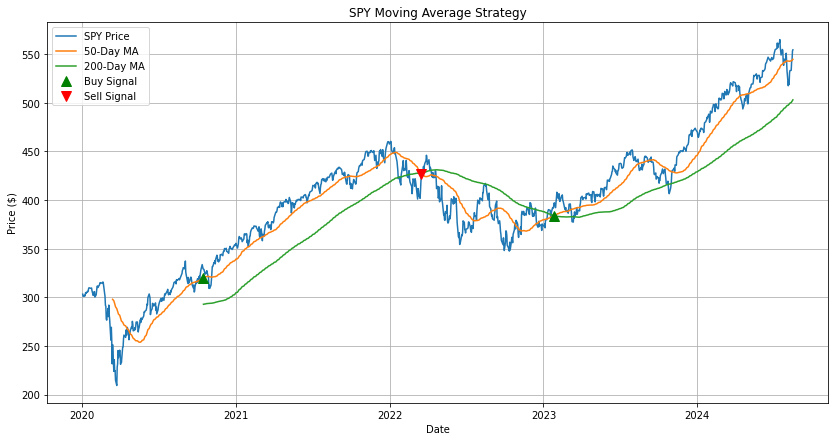

In [18]:
# Plot signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['SPY'], label='SPY Price')
plt.plot(spy_signals['Short MA'], label='50-Day MA')
plt.plot(spy_signals['Long MA'], label='200-Day MA')

# Plot buy and sell signals
plt.plot(spy_signals[spy_signals['Position'] == 1.0].index, 
         spy_signals['Short MA'][spy_signals['Position'] == 1.0], 
         '^', markersize=10, color='g', label='Buy Signal')

plt.plot(spy_signals[spy_signals['Position'] == -1.0].index, 
         spy_signals['Short MA'][spy_signals['Position'] == -1.0], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('SPY Moving Average Strategy')
plt.legend()
plt.grid(True)
plt.show()


### Step 8: Use a larger time window, and apply the strategy to SPY and QQQ

[*********************100%%**********************]  2 of 2 completed


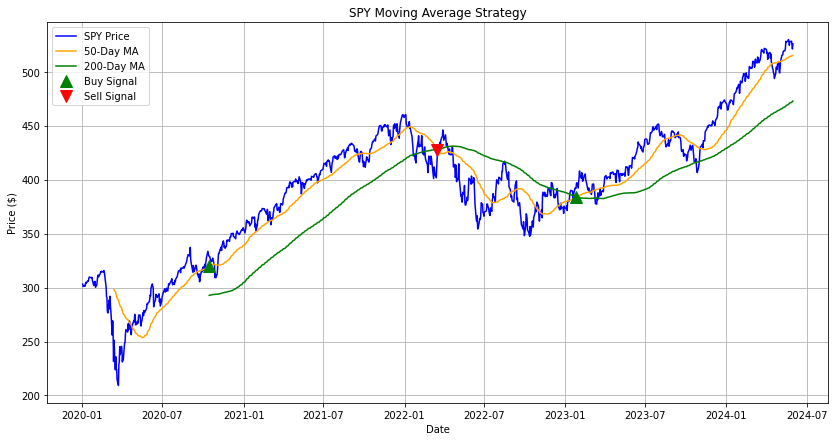

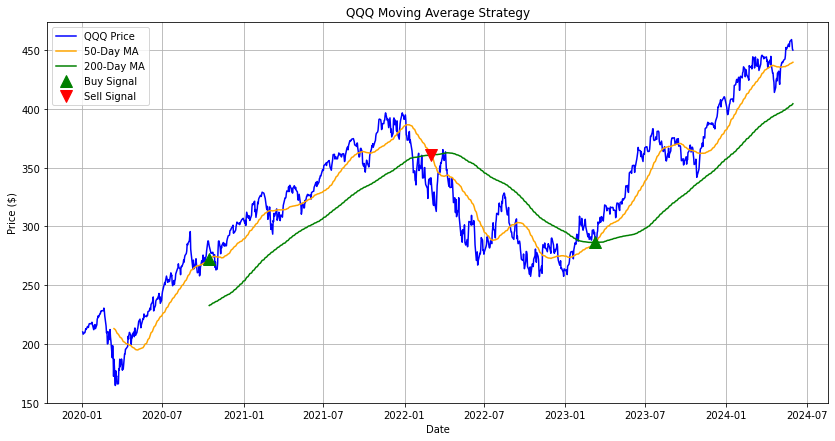

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download stock data for SPY and QQQ
tickers = ['SPY', 'QQQ']
data = yf.download(tickers, start='2020-01-01', end='2024-06-01')['Adj Close']

# Function to calculate moving average strategy signals
def moving_average_strategy(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['Price'] = data
    signals['Short MA'] = data.rolling(window=short_window).mean()
    signals['Long MA'] = data.rolling(window=long_window).mean()
    signals['Signal'] = 0.0
    signals['Signal'][short_window:] = np.where(signals['Short MA'][short_window:] > signals['Long MA'][short_window:], 1.0, 0.0)
    signals['Position'] = signals['Signal'].diff()
    return signals

# Apply strategy to SPY
spy_signals = moving_average_strategy(data['SPY'], short_window=50, long_window=200)

# Apply strategy to QQQ
qqq_signals = moving_average_strategy(data['QQQ'], short_window=50, long_window=200)

# Plotting SPY Moving Average Strategy
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['SPY'], label='SPY Price', color='blue')
plt.plot(spy_signals.index, spy_signals['Short MA'], label='50-Day MA', color='orange')
plt.plot(spy_signals.index, spy_signals['Long MA'], label='200-Day MA', color='green')

# Buy signals
plt.plot(spy_signals[spy_signals['Position'] == 1.0].index, 
         spy_signals['Short MA'][spy_signals['Position'] == 1.0], 
         '^', markersize=12, color='green', lw=0, label='Buy Signal')

# Sell signals
plt.plot(spy_signals[spy_signals['Position'] == -1.0].index, 
         spy_signals['Short MA'][spy_signals['Position'] == -1.0], 
         'v', markersize=12, color='red', lw=0, label='Sell Signal')

plt.title('SPY Moving Average Strategy')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plotting QQQ Moving Average Strategy
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['QQQ'], label='QQQ Price', color='blue')
plt.plot(qqq_signals.index, qqq_signals['Short MA'], label='50-Day MA', color='orange')
plt.plot(qqq_signals.index, qqq_signals['Long MA'], label='200-Day MA', color='green')

# Buy signals
plt.plot(qqq_signals[qqq_signals['Position'] == 1.0].index, 
         qqq_signals['Short MA'][qqq_signals['Position'] == 1.0], 
         '^', markersize=12, color='green', lw=0, label='Buy Signal')

# Sell signals
plt.plot(qqq_signals[qqq_signals['Position'] == -1.0].index, 
         qqq_signals['Short MA'][qqq_signals['Position'] == -1.0], 
         'v', markersize=12, color='red', lw=0, label='Sell Signal')

plt.title('QQQ Moving Average Strategy')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Step 9: Volatility Analysis (including Drawdowns): 

**"Investing in SPY or QQQ *can* be rewarding in the long time, but puts your capital at risk"**

[*********************100%%**********************]  2 of 2 completed


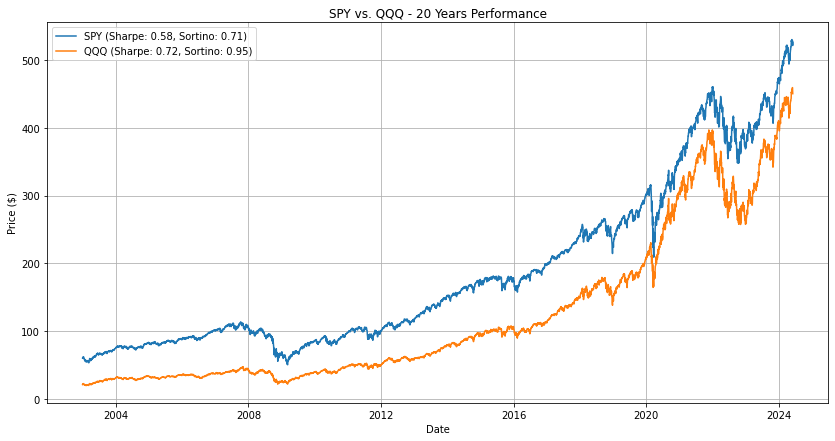

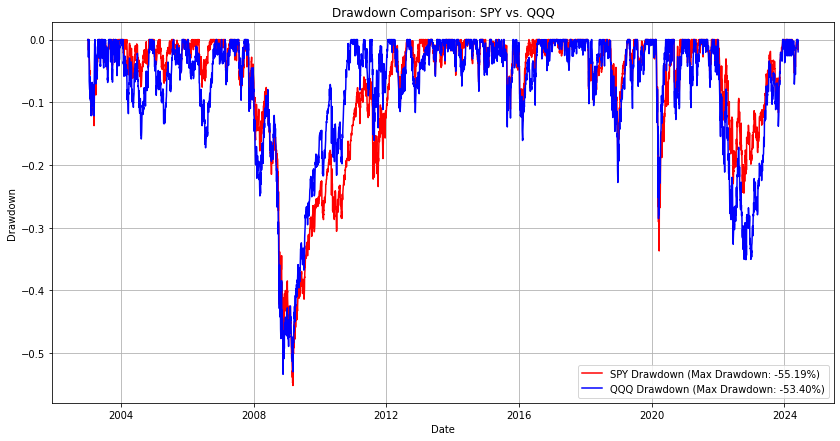

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download 20 years of data for SPY and QQQ
tickers = ['SPY', 'QQQ']
data = yf.download(tickers, start='2003-01-01', end='2024-06-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Function to calculate Sharpe and Sortino Ratios
def calculate_ratios(returns, risk_free_rate=0.01):
    mean_return = returns.mean() * 252
    std_dev = returns.std() * np.sqrt(252)
    downside_std_dev = returns[returns < 0].std() * np.sqrt(252)
    
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    sortino_ratio = (mean_return - risk_free_rate) / downside_std_dev
    
    return sharpe_ratio, sortino_ratio

# Function to calculate maximum drawdown
def calculate_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min(), drawdown

# Calculate Sharpe, Sortino, and Drawdown for SPY and QQQ
sharpe_spy, sortino_spy = calculate_ratios(returns['SPY'])
sharpe_qqq, sortino_qqq = calculate_ratios(returns['QQQ'])
drawdown_spy, spy_drawdown = calculate_drawdown(returns['SPY'])
drawdown_qqq, qqq_drawdown = calculate_drawdown(returns['QQQ'])

# Plot both ETFs and their drawdowns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['SPY'], label=f'SPY (Sharpe: {sharpe_spy:.2f}, Sortino: {sortino_spy:.2f})')
plt.plot(data.index, data['QQQ'], label=f'QQQ (Sharpe: {sharpe_qqq:.2f}, Sortino: {sortino_qqq:.2f})')
plt.title('SPY vs. QQQ - 20 Years Performance')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Plot the Drawdown for SPY and QQQ
plt.figure(figsize=(14, 7))
plt.plot(spy_drawdown, label=f'SPY Drawdown (Max Drawdown: {drawdown_spy:.2%})', color='red')
plt.plot(qqq_drawdown, label=f'QQQ Drawdown (Max Drawdown: {drawdown_qqq:.2%})', color='blue')
plt.title('Drawdown Comparison: SPY vs. QQQ')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Step 10: Volatility Analysis (including Drawdowns): 

### 10.000 USD investment in SPY vs QQQ follow up

## **past returns do not guarantee future returns**

**"Investing in SPY or QQQ *can* be rewarding in the long time, but puts your capital at risk"**

[*********************100%%**********************]  2 of 2 completed


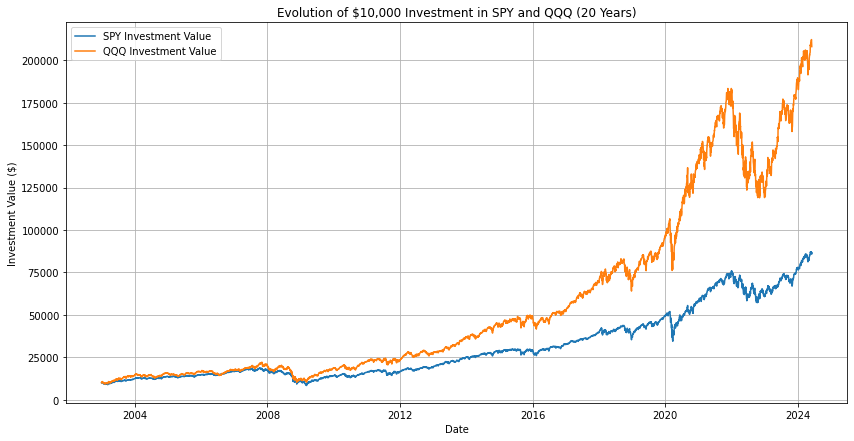

In [21]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download data
tickers = ['SPY', 'QQQ']
data = yf.download(tickers, start='2003-01-01', end='2024-06-01')['Adj Close']

# Calculate returns and investment value over time
initial_investment = 10000
investment_values = (data / data.iloc[0]) * initial_investment

# Plotting the evolution of the investment
plt.figure(figsize=(14, 7))
plt.plot(investment_values['SPY'], label=f'SPY Investment Value')
plt.plot(investment_values['QQQ'], label=f'QQQ Investment Value')
plt.title('Evolution of $10,000 Investment in SPY and QQQ (20 Years)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  2 of 2 completed


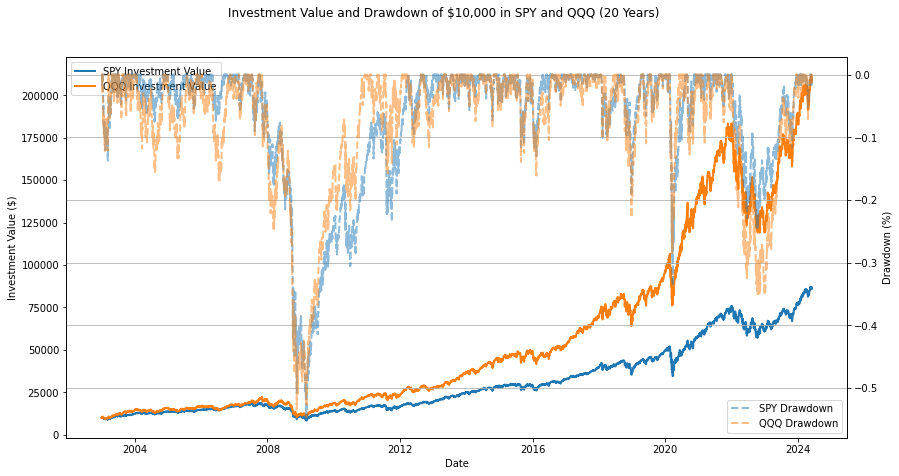

In [22]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download data
tickers = ['SPY', 'QQQ']
data = yf.download(tickers, start='2003-01-01', end='2024-06-01')['Adj Close']

# Calculate the investment value over time
initial_investment = 10000
investment_values = (data / data.iloc[0]) * initial_investment

# Calculate drawdowns
roll_max_SPY = investment_values['SPY'].cummax()
drawdown_SPY = (investment_values['SPY'] - roll_max_SPY) / roll_max_SPY

roll_max_QQQ = investment_values['QQQ'].cummax()
drawdown_QQQ = (investment_values['QQQ'] - roll_max_QQQ) / roll_max_QQQ

# Plotting the investment value and drawdowns
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot investment values with enhanced colors
ax1.plot(investment_values['SPY'], label='SPY Investment Value', color='#1f77b4', linewidth=2)
ax1.plot(investment_values['QQQ'], label='QQQ Investment Value', color='#ff7f0e', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Investment Value ($)')
ax1.legend(loc='upper left')

# Plot drawdowns on the same graph with a secondary y-axis and enhanced visibility
ax2 = ax1.twinx()
ax2.plot(drawdown_SPY, label='SPY Drawdown', linestyle='--', color='#1f77b4', alpha=0.5, linewidth=2)
ax2.plot(drawdown_QQQ, label='QQQ Drawdown', linestyle='--', color='#ff7f0e', alpha=0.5, linewidth=2)
ax2.set_ylabel('Drawdown (%)')

fig.suptitle('Investment Value and Drawdown of $10,000 in SPY and QQQ (20 Years)')
ax2.legend(loc='lower right')
plt.grid(True)
plt.show()


